<a href="https://colab.research.google.com/github/vpagonis/Classical_Mechanics_2nd_Edition/blob/main/Chapter10/Python_Codes_Chapter_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example 10.3

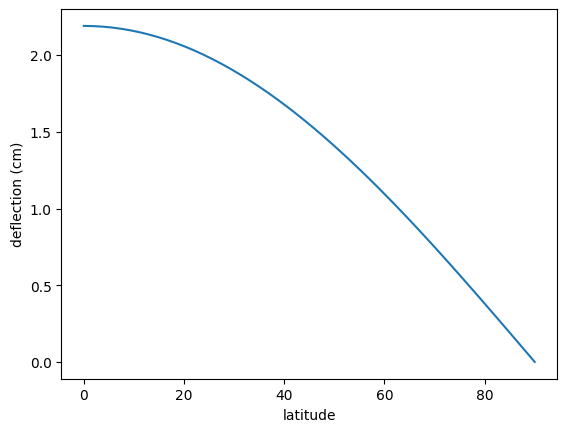

In [ ]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt

w = 7.272*10**(-5)  # angular speed of Earth
g = 9.8
H = 100

l = np.linspace(0,np.pi/2) # latitude, lambda

deflection = 1/3*w*np.sqrt(8*H**3/g)*np.cos(l)

plt.plot(l*180/np.pi,deflection*100)
plt.ylabel("deflection (cm)")
plt.xlabel("latitude")
plt.show()


# Example 10.4

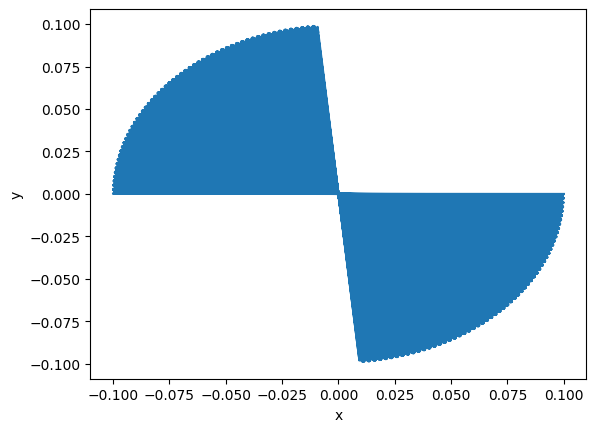

In [ ]:
%reset -f

from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

w = 7.272*10**(-5)    #angular velocity of Earth
lam = 48.8*np.pi/180  #lambda
l, g = 67, 9.8        #length of pendulum, g
wz = w*np.sin(lam)
b = g/l               #beta-squared

def deriv(u,t):
    x, y, r, s = u
    dydt = [r, s,  -b**2*x + 2*wz*s, -b**2*y - 2*wz*r ]
    return dydt

t = np.linspace(0,27000,10000)
ics = [0.1,0,0,0]

soln = odeint(deriv, ics, t)

x_coord = soln[:,0]
y_coord = soln[:,1]

plt.plot(x_coord,y_coord)
plt.ylabel('y')
plt.xlabel('x')
plt.show()


# Example 10.5

In [ ]:
%reset -f

from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
print('-'*28,'CODE OUTPUT','-'*29,'\n')

w = 7.272*10**(-5)                # angular velocity of Earth
a, l = 45*np.pi/180, 50*np.pi/180 #launch angle alpha. latitude
v0, g = 200, 9.8                  # initial velocity, g

z0_dot = v0*np.sin(a)
y0_dot = v0*np.cos(a)

def deriv(u,t):
    x, y, z, q, r, s = u
    dydt = [q, r, s, 2*r*w*np.sin(l), \
        -2*w*(s*np.cos(l) + q*np.sin(l)),\
            -g + 2*r*w*np.cos(l)]
    return dydt

t = np.linspace(0,1000,10000)
ics = [0, 0, 0, 0, y0_dot, z0_dot]
soln = odeint(deriv, ics, t)

x_coord = soln[:,0]
y_coord = soln[:,1]
z_coord = soln[:,2]

z_zero_crossings = np.where(np.diff(np.sign(z_coord)))[0]
print('The indices of the zero crossing are:',z_zero_crossings)

tof_index = z_zero_crossings[1]+1 #index of time of flight

time_of_flight = t[tof_index]
print('\nThe time of flight is: ', round(time_of_flight,2),' s')

print('\nThe Coriolis deflection = ',\
round(x_coord[tof_index],2),' m')

print('\nThe range = ', round(y_coord[tof_index],2),' m')


---------------------------- CODE OUTPUT ----------------------------- 

The indices of the zero crossing are: [  0 288]

The time of flight is:  28.9  s

The Coriolis deflection =  6.58  m

The range =  4085.64  m
